In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
import json  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from PIL import Image
import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
import tensorflow as tf
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#from tensorflow import keras as keras
import keras

Using TensorFlow backend.


In [3]:
from keras import backend as K

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import callbacks
from keras.utils.vis_utils import plot_model

In [6]:
'./shipsnet.json'
def load_file(filename):
    with open(filename) as data_file:
        dataset_js = json.load(data_file)
        dataset = pd.DataFrame(dataset)
        data_file.close()
    x = np.array(dataset['data']).astype('uint8')
    y = np.array(dataset['labels']).astype('uint8')
    return x, y

In [24]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of NoShip Images: {}'.format(np.sum(b==0)))
    print('Number of Ship Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(x,y)

Total number of images: 4000
Number of NoShip Images: 3000
Number of Ship Images: 1000
Percentage of positive images: 25.00%
Image shape (Width, Height, Channels): (19200,)


In [25]:
xReshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
yReshaped = to_categorical(y, num_classes=2)
print("Data Shape",x.shape)
print('Labels Shape',y.shape)
print('Reshaped Data Shape',xReshaped.shape)
print('Reshaped Labels Shape',yReshaped.shape)

Data Shape (4000, 19200)
Labels Shape (4000,)
Reshaped Data Shape (4000, 80, 80, 3)
Reshaped Labels Shape (4000, 2)


In [26]:
def describeDataset(features,labels):
    print("\n'X' shape: %s."%(features.shape,))
    print("\n'y' shape: %s."%(labels.shape,))
    print("\nUnique elements in y: %s"%(np.unique(y)))
describeDataset(xReshaped,yReshaped)


'X' shape: (4000, 80, 80, 3).

'y' shape: (4000, 2).

Unique elements in y: [0 1]


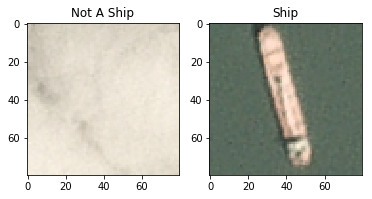

In [27]:
imgs0 = xReshaped[y==0] 
imgs1 = xReshaped[y==1] 
def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('Not A Ship')
    plt.imshow(a[100])
    plt.subplot(1,2,2)
    plt.title('Ship')
    plt.imshow(b[100])
plotOne(imgs0, imgs1) 

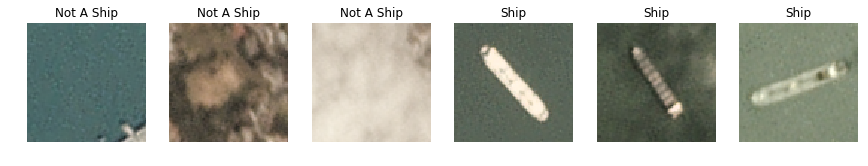

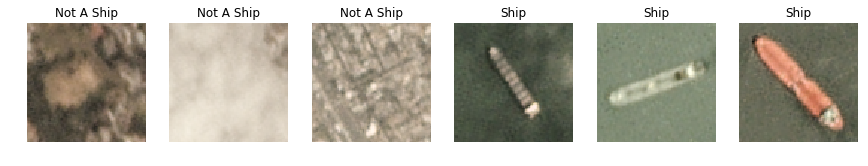

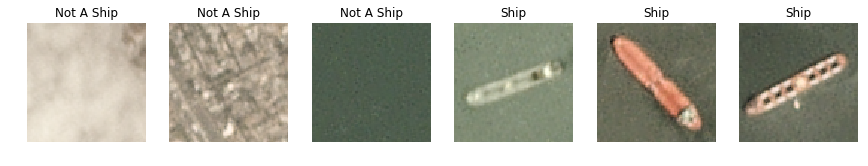

In [28]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('Not A Ship')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('Ship')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

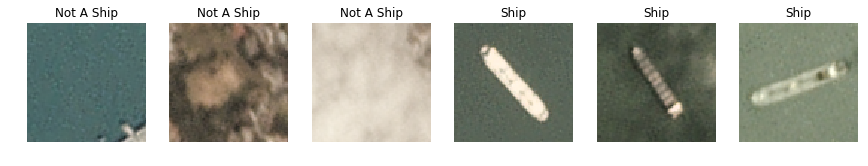

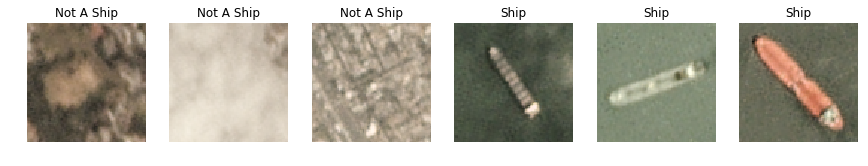

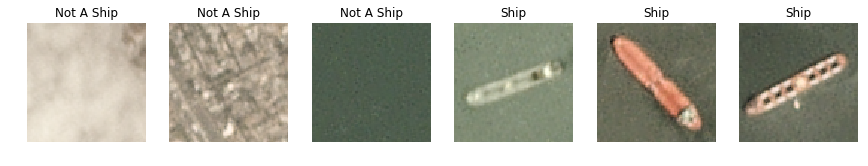

In [29]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('Not A Ship')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('Ship')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

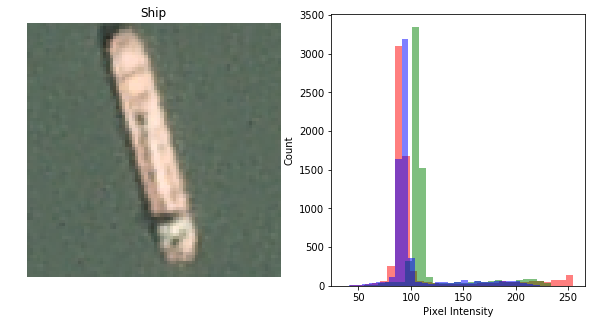

In [44]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('Ship' if y[1] else 'Not A Ship')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(xReshaped[100])

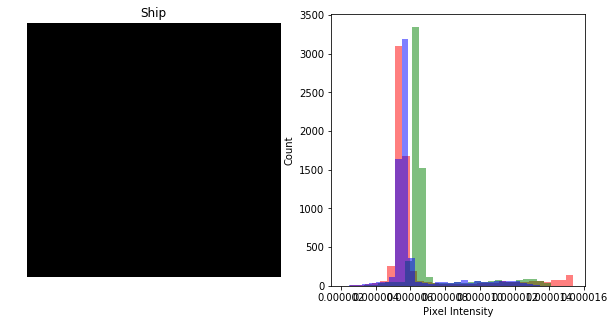

In [32]:
xReshaped = xReshaped/255
plotHistogram(xReshaped[100])

#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 123)
# Reduce Sample Size for DeBugging
x_train = x_train[0:300000] 
y_train = y_train[0:300000]
x_test = x_test[0:300000] 
y_test = y_test[0:300000]

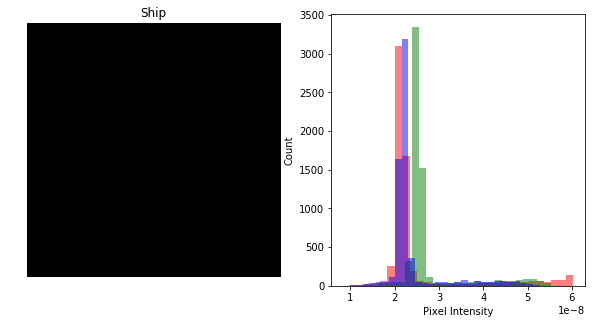

In [33]:
xReshaped = xReshaped/255
plotHistogram(xReshaped[100])

#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 123)
# Reduce Sample Size for DeBugging
x_train = x_train[0:300000] 
y_train = y_train[0:300000]
x_test = x_test[0:300000] 
y_test = y_test[0:300000]

x_trainReshaped,x_testReshaped,y_trainReshaped,y_testReshaped = train_test_split(xReshaped,yReshaped,test_size = 0.2 ,random_state = 123)
# Reduce Sample Size for DeBugging
x_trainReshaped = x_trainReshaped[0:300000] 
y_trainReshaped = y_trainReshaped[0:300000]
x_testReshaped = x_testReshaped[0:300000] 
y_testReshaped = y_testReshaped[0:300000]


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.890938 (0.008778)
DTC: 0.898438 (0.018606)


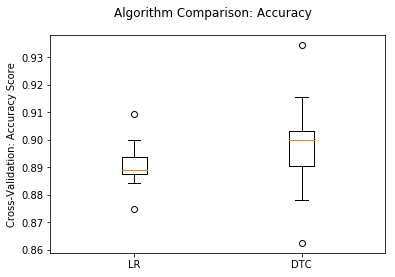

LR = LogisticRegression
DTC = DecisionTreeClassifier


In [34]:
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):   
    print('\nCompare Multiple Classifiers:')
    print('\nK-Fold Cross-Validation Accuracy:\n')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('DTC', DecisionTreeClassifier()))
#    models.append(('GBC', GradientBoostingClassifier()))
#    models.append(('LDA', LinearDiscriminantAnalysis()))  
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a,b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, a,b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(x_train,y_train,x_test,y_test)

def defineModels():
    print('LR = LogisticRegression')
    print('DTC = DecisionTreeClassifier')
#    print('GBC = GradientBoostingClassifier')
#    print('LDA = LinearDiscriminantAnalysis')
    return
defineModels()

In [ ]:
!jupyter nbconvert --to script bella.ipynb